# Student: McLaughlin, Chris

# Problem 1 - Multi-dimensional coat

## Notes/README
- Notebook is heavy on memory usage and MUST be run in an environment with sufficient RAM - Assignment was done in Google Collab!

## Acknowledgements/Citations

- Lab 11 - PCA
- https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
- https://pandas.pydata.org/docs/user_guide/merging.html
- https://github.com/zalandoresearch/fashion-mnist
- https://dax-cdn.cdn.appdomain.cloud/dax-fashion-mnist/1.0.2/data-preview/Part%201%20-%20Data%20Exploration.html
- https://vitalflux.com/pca-explained-variance-concept-python-example/#:~:text=Explained%20variance%20is%20calculated%20as,decomposition%20PCA%20class.
- https://machinelearningmastery.com/principal-component-analysis-for-visualization/
- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
- https://stackoverflow.com/questions/36566844/pca-projection-and-reconstruction-in-scikit-learn
- https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/
- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

## Setup

In [1]:
# This should be roughly the content of the first code cell
import numpy as np
import random
np.random.seed(1337)
random.seed(1337)

In [2]:
# Plotting support
from matplotlib import pyplot as plt
#from plotnine import *
# Standard libraries
import pandas as pd
import sklearn as sk
from keras.datasets import fashion_mnist
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## a) Dataset

In [3]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()
# We're just going to use the training data here. There are 10 unique classes (labels 0-9), and we need to make sure we have at least 500 of each per the assignment spec, so we're just going to grab the first 500 of each class from the training dataset and chuck them in a new array
trainunfiltered=pd.DataFrame(train_X.reshape(60000,784)) # Normalise 0-1
trainunfiltered["RESULT"]=train_y
#trainunfiltered.head()
dfs=[]
for i in range(10):
  dfs.append(trainunfiltered.loc[trainunfiltered["RESULT"]==i].head(500))
data=pd.concat(dfs).reset_index() # Reset index for clean indexing - doesn't really matter since iloc will return correct indexes anyway but the mismatched name value is annoying me!
data=data.drop(columns=["index"])
data

4422102/4422102 [==============================] - 0s 0us/step


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,RESULT
0,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,11,142,200,...,110,158,18,0,3,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,80,46,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


Label Table (from fashion-mnist github):

| Label | Description |
|---|---|
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle boot

## b) Dimensionality

We're going to run 4 component PCA on the dataset and plot the resulting top 4 components in two seperate 2D plots.

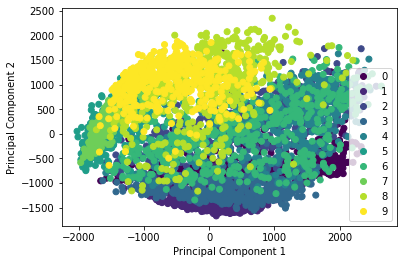

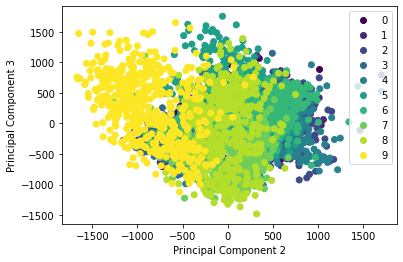

Explained Variance Array: [0.2894057  0.17891144 0.05921906 0.04999355], Total Explained Variance: 0.5775297459408532


In [4]:
pca = PCA(n_components=4)
pcaresults=pca.fit_transform(data.drop(columns=["RESULT"]))

#pca.components_
# Plot code here is inspired by MLM and Lab 11 - see acknowledgements
plot = plt.scatter(pcaresults[:,0], pcaresults[:,1], c=data["RESULT"])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=plot.legend_elements()[0], labels=list(pd.unique(data['RESULT'])))
plt.show()

plot = plt.scatter(pcaresults[:,2], pcaresults[:,3], c=data["RESULT"])
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.legend(handles=plot.legend_elements()[0], labels=list(pd.unique(data['RESULT'])))
plt.show()

print("Explained Variance Array: %s, Total Explained Variance: %s" % (pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)))

And we can see a little bit of clustering emerge, though there is sadly still a lot of overlap. Sadly though, our total variance explained is only a little over 57%. Let's figure out how to get that up to 75%!

In [5]:
do = True
i = 0
while do:
  i+=1
  pcatemp = PCA(n_components=i)
  pcaresultstemp=pcatemp.fit_transform(data.drop(columns=["RESULT"]))
  print(i, sum(pcatemp.explained_variance_ratio_))
  if sum(pcatemp.explained_variance_ratio_)>=0.75:
    do = False

1 0.2894057022880435
2 0.46831714276215763
3 0.5275361978487917
4 0.5775297459408619
5 0.6177876198469483
6 0.6520382569145536
7 0.674902078903179
8 0.6947554783530344
9 0.7083509934284099
10 0.7213150886213401
11 0.7314007644343816
12 0.7402464541547762
13 0.7480465330800506
14 0.754736110616987


Alright! We can see that with 14 components we can explain over 75% of the variance!

We're going to randomly pick three samples (I'm doing 200, 800, and 1337) from the dataset and show the difference between their original form and their projection to 14-dimensional space!

Sample Index: 200
Original Image:


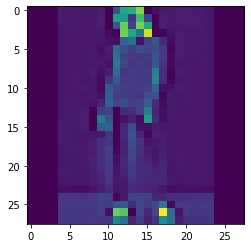

Projected to 14-dimensional space:


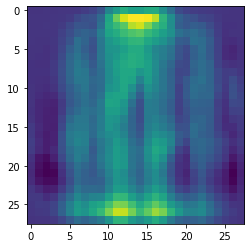

Sample Index: 800
Original Image:


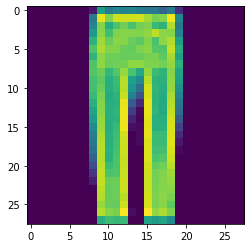

Projected to 14-dimensional space:


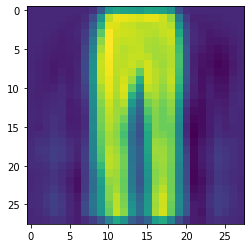

Sample Index: 1337
Original Image:


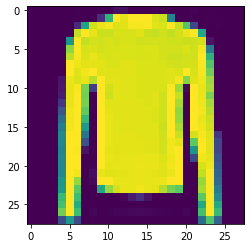

Projected to 14-dimensional space:


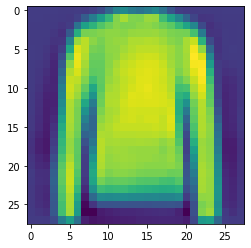

In [6]:
# Credit to Lab 11 for the framework of how to do this
pca14 = PCA(n_components=14)
pca14results = pca14.fit_transform(data.drop(columns=["RESULT"]))
#plt.imshow(pca14.components_[0].reshape(28,28), cmap="gray")
#pca14results.shape

reconstructed=pca14.inverse_transform(pca14results) # Credit to stackoverflow linked in acknowledgements for basic premise of how to reconstruct via inverse

for i in [200,800,1337]:
  print("Sample Index:", i)
  print("Original Image:")
  plt.imshow(data.drop(columns=["RESULT"]).iloc[i].to_numpy().reshape(28,28))
  plt.show()
  print("Projected to 14-dimensional space:")
  plt.imshow(reconstructed[i].reshape(28,28))
  plt.show()

Cool! We can see there's some data being lost, but the resulting projection is still very identifiable!

## c) Plot

Let's check out the scatterplot of our top two components again now that we have a more functional projection!

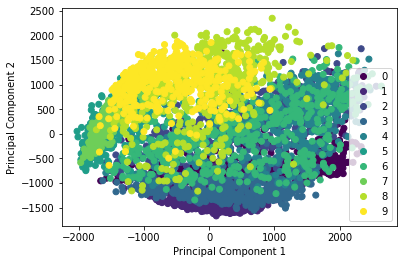

In [7]:
plt.scatter(pca14results[:,0], pca14results[:,1], c=data["RESULT"])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=plot.legend_elements()[0], labels=list(pd.unique(data['RESULT'])))
plt.show()

Aaaaand there's no improvement in the legibility of this plot whatsoever, which makes sense, since higher n-component PCA runs are iterative - these are the same two topmost components as earlier! It's at least still somewhat demonstrating clustering, but without the colour differentiation it'd just look like a blob.

## d) SNE

We're going to try this with t-SNE now, and see if we get better results for our scatterplot!

Warning that this can take a little while to execute!

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


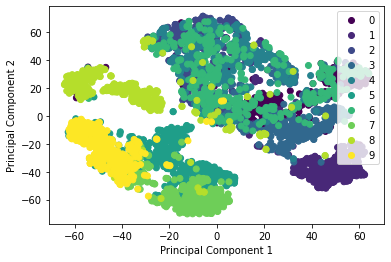

In [ ]:
tsne = TSNE(n_components=2) # We're doing 2 components since 14 threw an exception telling me to do less than 4, and 2 is the default, also it means our 2D scatterplot will show us all our components!
tsneresults=tsne.fit_transform(data.drop(columns=["RESULT"]))
#tsneresults
plt.scatter(tsneresults[:,0], tsneresults[:,1], c=data["RESULT"])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=plot.legend_elements()[0], labels=list(pd.unique(data['RESULT'])))
plt.show()

Okay cool! We can see significantly better defined clusters for some sample classes, while others remain middling. This is a solid improvement over PCA in terms of scatterplot legibility!